# Data Preprocessing and EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('Data/air_quality.csv')  

# Count the number of unique cities
city_count = data['City'].nunique()

# Print the result
print("Total number of cities:", city_count)

Total number of cities: 26


In [3]:
city_percentage = data['City'].value_counts(normalize=True) * 100

# Print the result
print("Percentage of city-wise data:")
print(city_percentage)

Percentage of city-wise data:
Delhi                 7.134993
Bengaluru             7.131442
Hyderabad             7.113684
Lucknow               7.071066
Mumbai                7.063963
Chennai               7.063963
Patna                 6.069539
Gurugram              5.760557
Ahmedabad             5.536811
Visakhapatnam         5.075115
Amritsar              4.244060
Jaipur                3.935078
Thiruvananthapuram    3.903115
Jorapokhar            3.363284
Amaravati             3.185709
Kolkata               2.890933
Talcher               2.887381
Brajrajnagar          2.823454
Guwahati              1.782860
Coimbatore            1.363782
Chandigarh            1.079660
Bhopal                0.994424
Shillong              0.983770
Kochi                 0.575345
Ernakulam             0.564691
Aizawl                0.401321
Name: City, dtype: float64


In [4]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Temperature,Humidity,WindSpeed
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,26.23,39.23,6.18
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,35.18,42.95,4.26
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,34.46,57.46,3.18
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,15.66,49.34,5.89
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,20.00,47.54,2.75


In [5]:
data.shape

(28157, 19)

In [6]:
data.isnull().sum()

City               0
Date               0
PM2.5           3224
PM10            9766
NO              2208
NO2             2211
NOx             2811
NH3             8954
CO               685
SO2             2480
O3              2648
Benzene         4249
Toluene         6667
Xylene         16735
AQI             3307
AQI_Bucket      3307
Temperature        0
Humidity           0
WindSpeed          0
dtype: int64

In [7]:

# Get unique AQI buckets
aqi_buckets = data['AQI_Bucket'].unique()

# Iterate over AQI buckets and find the range of AQI values
for bucket in aqi_buckets:
    filtered_data = data[data['AQI_Bucket'] == bucket]
    aqi_range_min = filtered_data['AQI'].min()
    aqi_range_max = filtered_data['AQI'].max()
    print("AQI Range for", bucket, "bucket:", aqi_range_min, "to", aqi_range_max)


AQI Range for nan bucket: nan to nan
AQI Range for Poor bucket: 201.0 to 300.0
AQI Range for Very Poor bucket: 301.0 to 400.0
AQI Range for Severe bucket: 401.0 to 2049.0
AQI Range for Moderate bucket: 101.0 to 200.0
AQI Range for Satisfactory bucket: 51.0 to 100.0
AQI Range for Good bucket: 13.0 to 50.0


In [8]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Temperature,Humidity,WindSpeed
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,26.23,39.23,6.18
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,35.18,42.95,4.26
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,34.46,57.46,3.18
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,15.66,49.34,5.89
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,20.00,47.54,2.75


In [9]:
# Drop rows where 'PM2.5', 'PM10', and 'NH3' columns are null together
data = data.dropna(subset=['PM2.5', 'PM10', 'NH3'], how='all')

# Print the updated DataFrame 'data'
print(data)


                City        Date   PM2.5   PM10     NO    NO2    NOx    NH3  \
27         Ahmedabad  2015-01-28   73.24    NaN   5.72  21.11  25.84    NaN   
28         Ahmedabad  2015-01-29   83.13    NaN   6.93  28.71  33.72    NaN   
29         Ahmedabad  2015-01-30   79.84    NaN  13.85  28.68  41.08    NaN   
30         Ahmedabad  2015-01-31   94.52    NaN  24.39  32.66  52.61    NaN   
31         Ahmedabad  2015-02-01  135.99    NaN  43.48  42.08  84.57    NaN   
...              ...         ...     ...    ...    ...    ...    ...    ...   
28152  Visakhapatnam  2020-06-27   15.02  50.94   7.68  25.06  19.54  12.47   
28153  Visakhapatnam  2020-06-28   24.38  74.09   3.42  26.06  16.53  11.99   
28154  Visakhapatnam  2020-06-29   22.91  65.73   3.45  29.53  18.33  10.71   
28155  Visakhapatnam  2020-06-30   16.64  49.97   4.05  29.26  18.80  10.03   
28156  Visakhapatnam  2020-07-01   15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xyle

In [10]:
data.shape

(26017, 19)

In [11]:
data.isnull().sum()

City               0
Date               0
PM2.5           1084
PM10            7626
NO               480
NO2              479
NOx             2046
NH3             6814
CO               476
SO2              715
O3               932
Benzene         3864
Toluene         6280
Xylene         16222
AQI             1225
AQI_Bucket      1225
Temperature        0
Humidity           0
WindSpeed          0
dtype: int64

In [12]:
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].mean())
data['PM10'] = data['PM10'].fillna(data['PM10'].mean())
data['NO'] = data['NO'].fillna(data['NO'].mean())
data['NO2'] = data['NO2'].fillna(data['NO2'].mean())
data['NOx'] = data['NOx'].fillna(data['NOx'].mean())
data['NH3'] = data['NH3'].fillna(data['NH3'].mean())
data['CO'] = data['CO'].fillna(data['CO'].mean())
data['SO2'] = data['SO2'].fillna(data['SO2'].mean())
data['O3'] = data['O3'].fillna(data['O3'].mean())
data['Benzene'] = data['Benzene'].fillna(data['Benzene'].mean())
data['Toluene'] = data['Toluene'].fillna(data['Toluene'].mean())
data['Xylene'] = data['Xylene'].fillna(data['Xylene'].mean())
data['AQI'] = data['AQI'].fillna(data['AQI'].mode()[0])
data['AQI_Bucket'] = data['AQI_Bucket'].fillna('Moderate')

In [13]:
data.isnull().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket     0
Temperature    0
Humidity       0
WindSpeed      0
dtype: int64

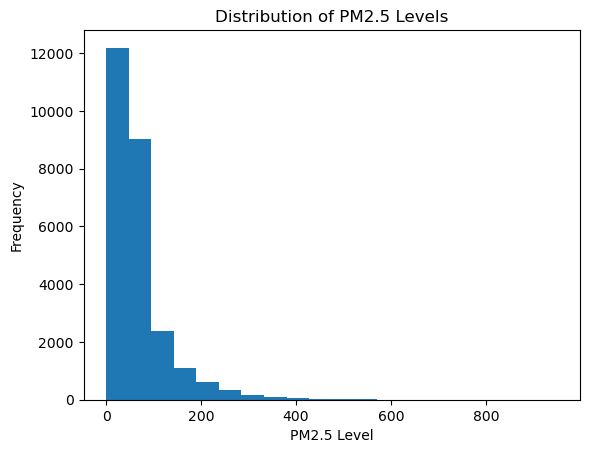

In [14]:
import matplotlib.pyplot as plt
plt.hist(data['PM2.5'], bins=20)
plt.xlabel('PM2.5 Level')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Levels')
plt.show()

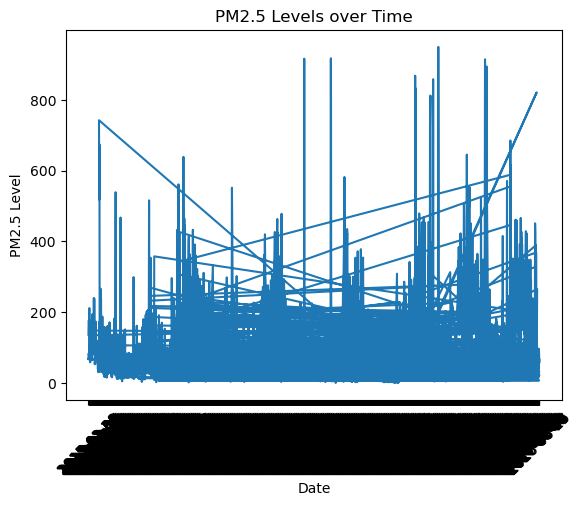

In [15]:
plt.plot(data['Date'], data['PM2.5'])
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Levels over Time')
plt.xticks(rotation=45)
plt.show()

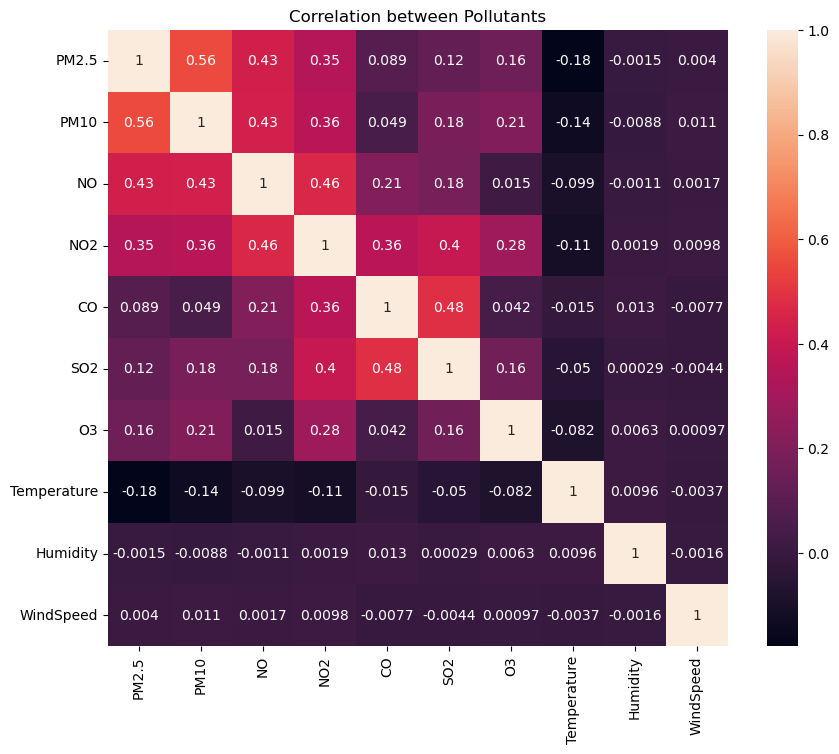

In [16]:
import seaborn as sns
correlation = data[['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

plt.title('Correlation between Pollutants')
plt.show()

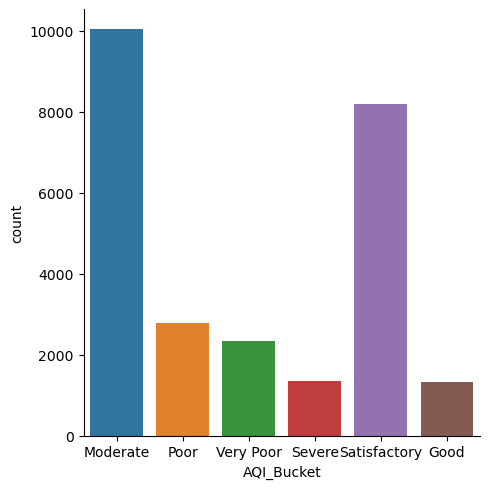

In [17]:
plot = sns.catplot(x="AQI_Bucket",data=data,kind="count")

In [18]:
most_polluted = data[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,439.769175,117.083665,21.997091
Delhi,258.879422,228.523649,1.978022
Patna,233.566038,119.198400,1.582043
Gurugram,219.073443,153.733151,1.313764
Lucknow,217.164657,118.127103,1.752260
Talcher,163.332085,162.501162,1.861280
Jorapokhar,149.528899,148.867092,1.193427
Brajrajnagar,145.663671,124.107920,1.780077
Guwahati,139.551793,116.604900,0.738457


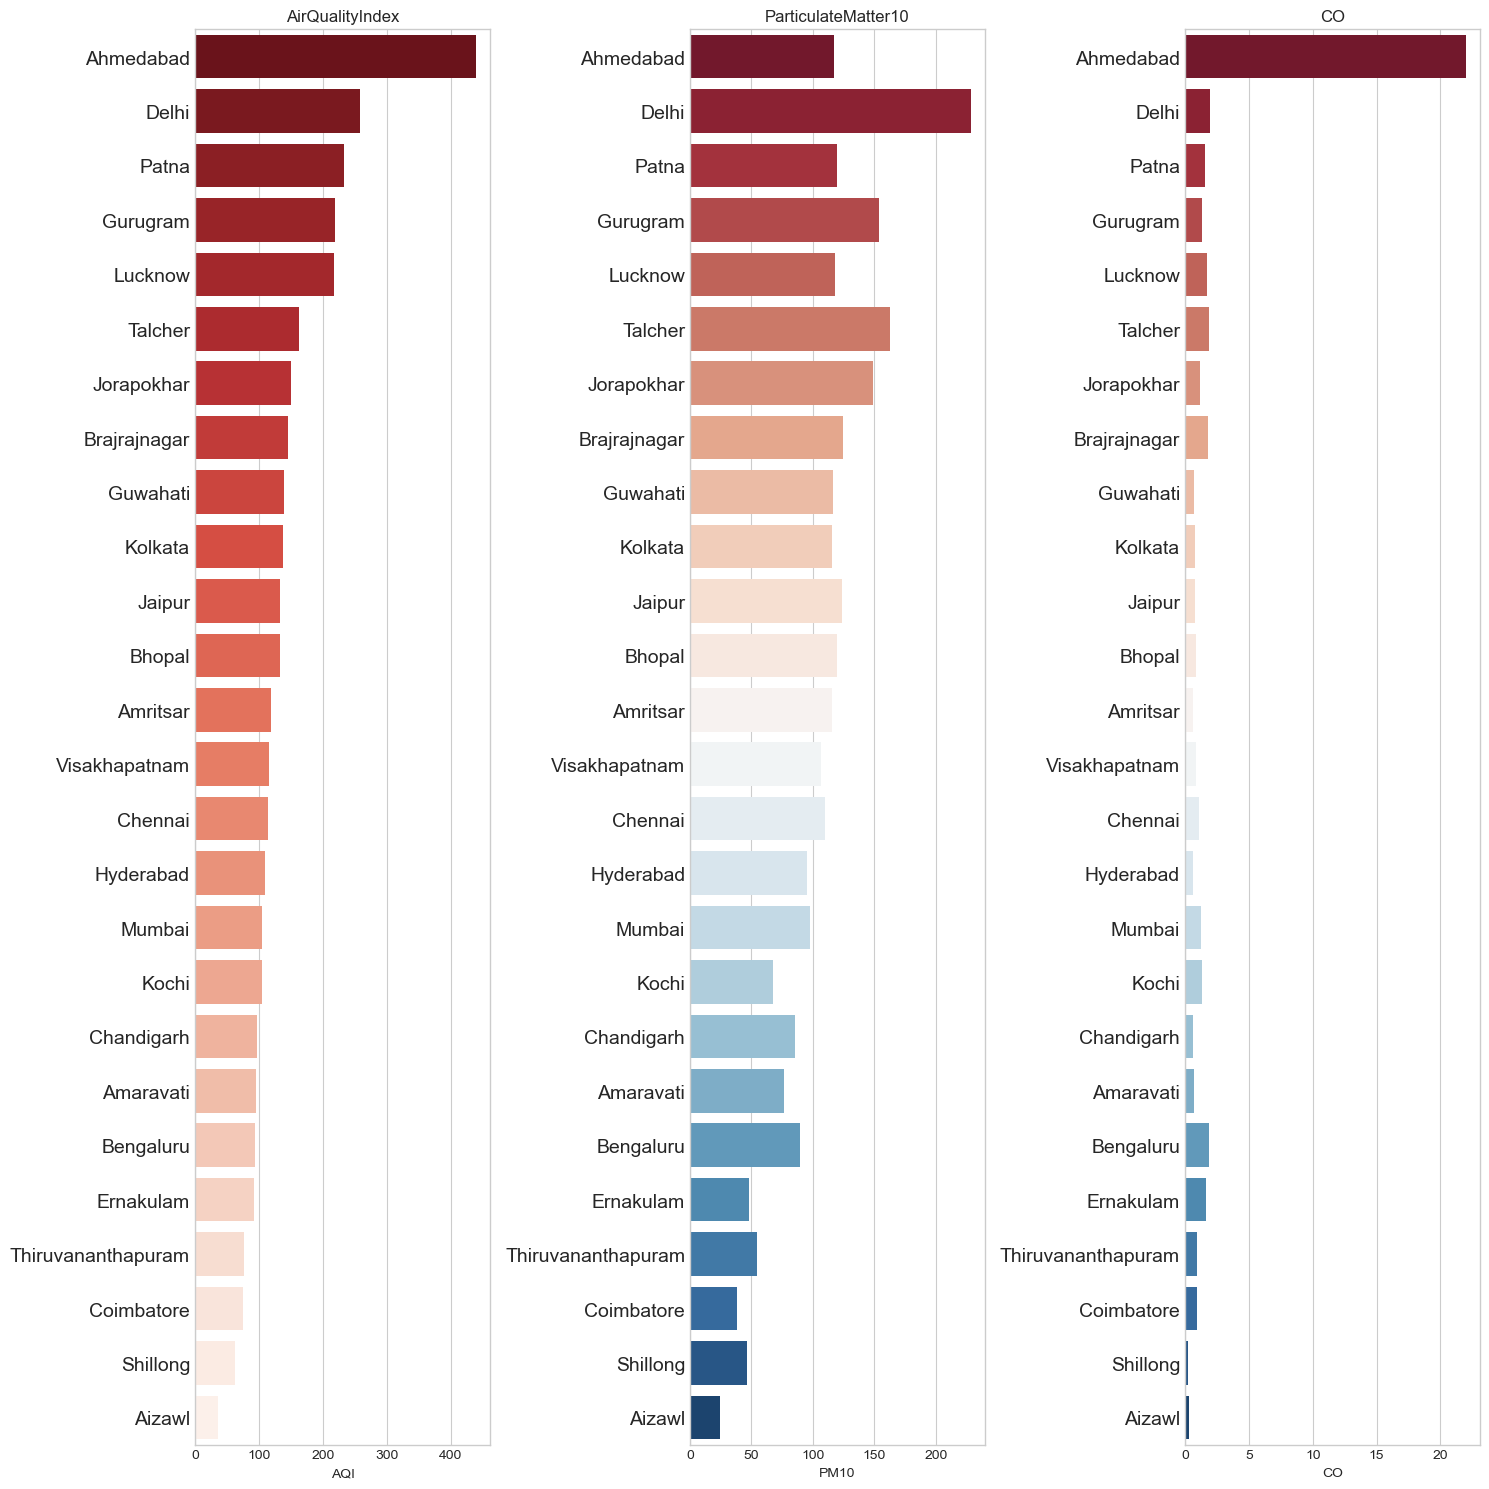

In [19]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [20]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Temperature,Humidity,WindSpeed
27,Ahmedabad,2015-01-28,73.24,118.127103,5.72,21.11,25.84,23.483476,5.72,36.52,62.42,0.03,0.01,1.41,100.0,Moderate,2.60,55.35,16.05
28,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor,8.42,46.90,11.63
29,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor,15.02,64.92,8.85
30,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe,16.75,38.84,3.70
31,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,10.95,59.14,8.86


In [21]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [22]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [23]:
data.drop(['Date'],axis=1,inplace=True)

In [24]:
data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Toluene,Xylene,AQI,AQI_Bucket,Temperature,Humidity,WindSpeed,Year,Month,Day
27,Ahmedabad,73.24,118.127103,5.72,21.11,25.84,23.483476,5.72,36.52,62.42,...,0.01,1.41,100.0,Moderate,2.60,55.35,16.05,2015,1,28
28,Ahmedabad,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,...,0.00,3.14,209.0,Poor,8.42,46.90,11.63,2015,1,29
29,Ahmedabad,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,...,0.00,4.81,328.0,Very Poor,15.02,64.92,8.85,2015,1,30
30,Ahmedabad,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,...,0.01,7.67,514.0,Severe,16.75,38.84,3.70,2015,1,31
31,Ahmedabad,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,...,0.04,25.87,782.0,Severe,10.95,59.14,8.86,2015,2,1


In [25]:
data.reset_index(drop=True,inplace=True)
data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Toluene,Xylene,AQI,AQI_Bucket,Temperature,Humidity,WindSpeed,Year,Month,Day
0,Ahmedabad,73.24,118.127103,5.72,21.11,25.84,23.483476,5.72,36.52,62.42,...,0.01,1.41,100.0,Moderate,2.60,55.35,16.05,2015,1,28
1,Ahmedabad,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,...,0.00,3.14,209.0,Poor,8.42,46.90,11.63,2015,1,29
2,Ahmedabad,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,...,0.00,4.81,328.0,Very Poor,15.02,64.92,8.85,2015,1,30
3,Ahmedabad,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,...,0.01,7.67,514.0,Severe,16.75,38.84,3.70,2015,1,31
4,Ahmedabad,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,...,0.04,25.87,782.0,Severe,10.95,59.14,8.86,2015,2,1


In [26]:
data.shape

(26017, 21)

In [27]:
data.isnull().sum()

City           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket     0
Temperature    0
Humidity       0
WindSpeed      0
Year           0
Month          0
Day            0
dtype: int64

In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,26017.0,67.450578,63.300003,0.04,29.69,50.650000,78.470000,949.99
PM10,26017.0,118.127103,76.176900,0.01,71.75,118.127103,121.510000,1000.00
NO,26017.0,17.584941,22.573145,0.03,5.71,10.070000,19.580000,390.68
NO2,26017.0,28.723100,24.375776,0.01,11.88,22.350000,37.490000,362.21
NOx,26017.0,32.037872,29.523912,0.00,13.88,25.640000,37.780000,382.84
NH3,26017.0,23.483476,22.065831,0.01,10.91,23.483476,24.280000,352.89
CO,26017.0,2.335522,6.986486,0.00,0.58,0.940000,1.530000,175.81
SO2,26017.0,14.436841,17.330169,0.01,5.78,9.440000,14.940000,186.08
O3,26017.0,34.682968,21.312111,0.01,19.49,31.930000,45.030000,257.73
Benzene,26017.0,3.521857,15.126421,0.00,0.32,1.810000,3.521857,455.03


In [29]:
data.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Temperature',
       'Humidity', 'WindSpeed', 'Year', 'Month', 'Day'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

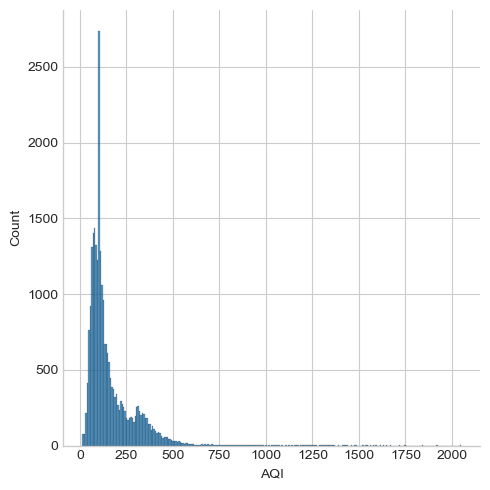

In [30]:
plt.figure(figsize=(10, 6))
sns.displot(data['AQI'])

In [31]:
data.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Temperature,Humidity,WindSpeed,Year,Month,Day
PM2.5,1.000000,0.558079,0.429829,0.345242,0.402568,0.189227,0.088785,0.124245,0.156511,0.021537,0.107004,0.069679,0.626098,-0.178079,-0.001486,0.003961,-0.224996,0.043122,-0.011509
PM10,0.558079,1.000000,0.434498,0.360150,0.439083,0.223025,0.048726,0.183107,0.205133,0.018884,0.122465,0.031088,0.483638,-0.135013,-0.008832,0.010882,-0.157313,-0.008999,-0.021214
NO,0.429829,0.434498,1.000000,0.464714,0.783443,0.157659,0.211470,0.177401,0.015245,0.033955,0.135908,0.059105,0.432841,-0.099137,-0.001121,0.001704,-0.021076,0.030051,-0.004533
NO2,0.345242,0.360150,0.464714,1.000000,0.605925,0.166412,0.361539,0.399410,0.284046,0.023287,0.250493,0.121957,0.526742,-0.111278,0.001930,0.009758,-0.079450,0.035746,-0.007164
NOx,0.402568,0.439083,0.783443,0.605925,1.000000,0.135713,0.245050,0.234524,0.088201,0.040776,0.182026,0.063806,0.465214,-0.107728,0.001526,0.002862,-0.003632,0.018197,-0.007009
NH3,0.189227,0.223025,0.157659,0.166412,0.135713,1.000000,0.020392,-0.021797,0.079294,-0.012576,0.005291,0.002615,0.142393,-0.056048,0.005375,0.007703,-0.200960,0.018733,0.001059
CO,0.088785,0.048726,0.211470,0.361539,0.245050,0.020392,1.000000,0.484999,0.041845,0.059495,0.276209,0.129928,0.662878,-0.014610,0.012582,-0.007671,-0.077987,0.009703,0.004570
SO2,0.124245,0.183107,0.177401,0.399410,0.234524,-0.021797,0.484999,1.000000,0.162447,0.034665,0.280437,0.203519,0.466603,-0.050051,0.000292,-0.004416,0.053186,-0.016420,0.003483
O3,0.156511,0.205133,0.015245,0.284046,0.088201,0.079294,0.041845,0.162447,1.000000,0.017671,0.111152,0.063206,0.193984,-0.082130,0.006291,0.000973,-0.036338,-0.084385,-0.002416
Benzene,0.021537,0.018884,0.033955,0.023287,0.040776,-0.012576,0.059495,0.034665,0.017671,1.000000,0.694239,0.082648,0.039178,-0.034636,0.003180,0.009018,0.023287,-0.015840,-0.007270


In [32]:
data.corr()['AQI'].sort_values(ascending = False)

AQI            1.000000
CO             0.662878
PM2.5          0.626098
NO2            0.526742
PM10           0.483638
SO2            0.466603
NOx            0.465214
NO             0.432841
Toluene        0.263721
O3             0.193984
NH3            0.142393
Xylene         0.134556
Benzene        0.039178
Month          0.021506
Humidity       0.007701
WindSpeed     -0.000280
Day           -0.004504
Temperature   -0.139528
Year          -0.177883
Name: AQI, dtype: float64

<AxesSubplot:xlabel='AQI', ylabel='CO'>

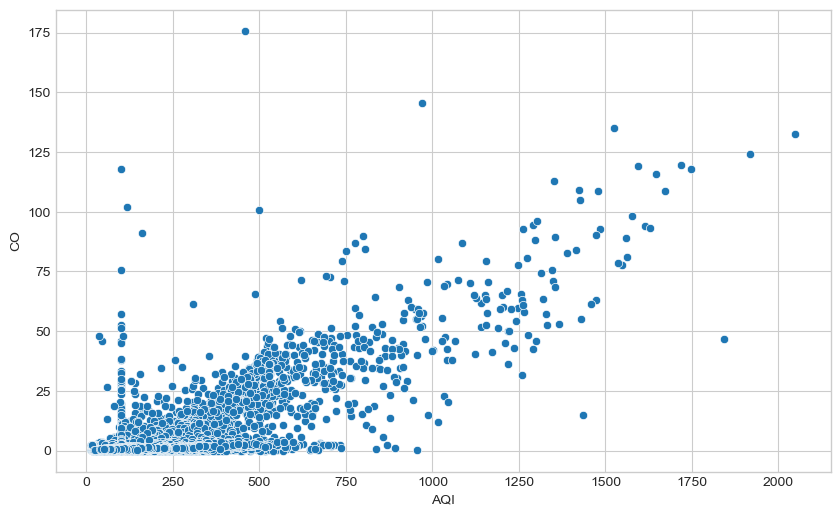

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'AQI', y = 'CO', data = data)

<AxesSubplot:xlabel='AQI', ylabel='PM2.5'>

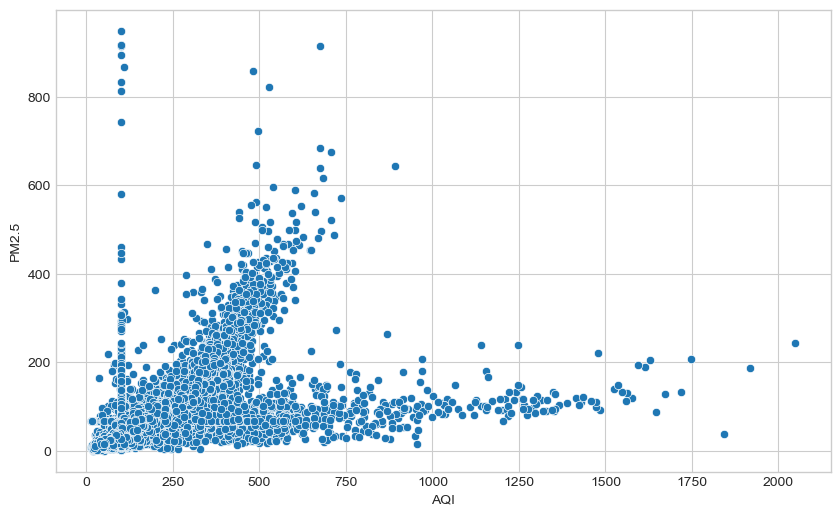

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'AQI', y = 'PM2.5', data = data)

# Feature Selection

In [35]:
X = data.drop(['City', 'AQI', 'AQI_Bucket'], axis = 1)
y = data['AQI']

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [37]:
# feature selection
def select_features(X, y):
    fs = SelectKBest(score_func = f_regression, k = 'all')
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

In [38]:
X_train_fs, fs = select_features(X, y)

dictScores = {}

for i in range(len(fs.scores_)):
    dictScores[fs.feature_names_in_[i]] = fs.scores_[i]
    print(f'{fs.feature_names_in_[i]}: {fs.scores_[i]}')


dictScores = dict(sorted(dictScores.items(), key = lambda x: x[1], reverse = True))

PM2.5: 16772.713314843968
PM10: 7942.9603040090105
NO: 5997.593523322143
NO2: 9989.781747291523
NOx: 7185.354871131619
NH3: 538.3891381997393
CO: 20391.275281693113
SO2: 7240.300755919208
O3: 1017.2179759391753
Benzene: 39.991586018699444
Toluene: 1944.5516495402514
Xylene: 479.6984346777604
Temperature: 516.5182298739963
Humidity: 1.5431008679331661
WindSpeed: 0.0020378092467983333
Year: 850.0714435164514
Month: 12.037776524885968
Day: 0.5276591435961978


In [39]:
for key, values in dictScores.items():
    print(f'{key} : {values}')

CO : 20391.275281693113
PM2.5 : 16772.713314843968
NO2 : 9989.781747291523
PM10 : 7942.9603040090105
SO2 : 7240.300755919208
NOx : 7185.354871131619
NO : 5997.593523322143
Toluene : 1944.5516495402514
O3 : 1017.2179759391753
Year : 850.0714435164514
NH3 : 538.3891381997393
Temperature : 516.5182298739963
Xylene : 479.6984346777604
Benzene : 39.991586018699444
Month : 12.037776524885968
Humidity : 1.5431008679331661
Day : 0.5276591435961978
WindSpeed : 0.0020378092467983333


In [40]:
X = data[['CO', 'PM2.5', 'NO2', 'PM10', 'SO2', 'NOx', 'NO', 'Toluene', 'O3']]
y = data['AQI']

In [41]:
X.shape

(26017, 9)

In [42]:
y.shape

(26017,)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Data Normalizaton

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
X_train = scaler.fit_transform(X_train)

In [48]:
X_test = scaler.transform(X_test)

In [49]:
import pickle
pickle.dump(scaler, open('SavedModels/Transformer.pkl','wb'))

# Model Training

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

In [51]:
earlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

In [52]:
csv_logger = CSVLogger('Logs/log.csv', append = True, separator = ';')

In [53]:
X_train.shape

(17431, 9)

In [54]:
model = Sequential()

model.add(Dense(9, activation = 'relu'))

model.add(Dense(9, activation = 'relu'))

model.add(Dense(9, activation = 'relu'))

model.add(Dense(9, activation = 'relu'))

model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [55]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [earlyStop, csv_logger])

Epoch 1/600
545/545 [==============================] - 3s 3ms/step - loss: 30524.1562 - val_loss: 12117.1934
Epoch 2/600
545/545 [==============================] - 2s 3ms/step - loss: 10849.1377 - val_loss: 8343.0195
Epoch 3/600
545/545 [==============================] - 2s 3ms/step - loss: 7607.6411 - val_loss: 6663.7666
Epoch 4/600
545/545 [==============================] - 2s 3ms/step - loss: 6387.2466 - val_loss: 6049.6899
Epoch 5/600
545/545 [==============================] - 2s 4ms/step - loss: 5661.7480 - val_loss: 5394.3994
Epoch 6/600
545/545 [==============================] - 3s 5ms/step - loss: 5092.4282 - val_loss: 4970.1050
Epoch 7/600
545/545 [==============================] - 2s 3ms/step - loss: 4673.8423 - val_loss: 4634.8013
Epoch 8/600
545/545 [==============================] - 2s 3ms/step - loss: 4360.7505 - val_loss: 4401.1289
Epoch 9/600
545/545 [==============================] - 2s 5ms/step - loss: 4155.9658 - val_loss: 4239.8662
Epoch 10/600
545/545 [============

In [56]:
model.save('SavedModels/AirQulaity.h5')

In [57]:
losses = pd.DataFrame(model.history.history)

In [58]:
losses

,loss,val_loss
0,30524.156250,12117.193359
1,10849.137695,8343.019531
2,7607.641113,6663.766602
3,6387.246582,6049.689941
4,5661.748047,5394.399414
...,...,...
56,2962.644287,2920.401367
57,2953.481445,2918.918701
58,2950.500488,2943.217773
59,2949.743408,2919.609131


<AxesSubplot:>

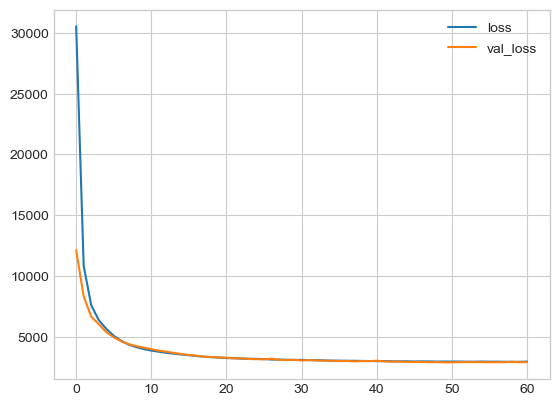

In [59]:
losses.plot()

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, accuracy_score

In [86]:
predictions = model.predict(X_test)

269/269 [==============================] - 0s 1ms/step


In [64]:
mean_squared_error(y_test, predictions)

2916.8512649668432

In [65]:
np.sqrt(mean_squared_error(y_test, predictions))

54.00788150785812

In [66]:
mean_absolute_error(y_test, predictions)

27.360163112412014

In [67]:
data['AQI'].describe()

count    26017.000000
mean       163.448207
std        138.152067
min         13.000000
25%         83.000000
50%        113.000000
75%        199.000000
max       2049.000000
Name: AQI, dtype: float64

In [68]:
explained_variance_score(y_test, predictions)

0.8402930868870327

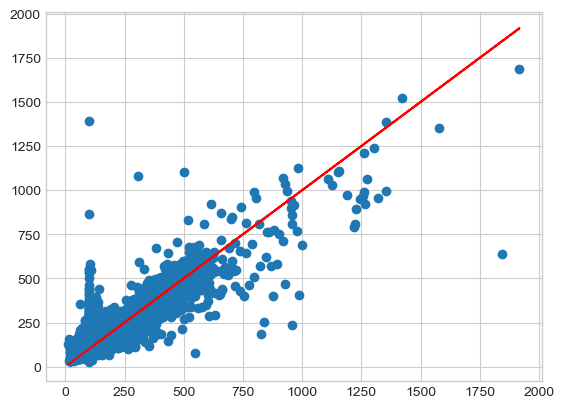

In [69]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

# New Data

In [70]:
data[['CO', 'PM2.5', 'NO2', 'PM10', 'SO2', 'NOx', 'NO', 'Toluene', 'O3']].iloc[1]

CO           6.930000
PM2.5       83.130000
NO2         28.710000
PM10       118.127103
SO2         49.520000
NOx         33.720000
NO           6.930000
Toluene      0.000000
O3          59.760000
Name: 1, dtype: float64

In [71]:
singleEntry = data[['CO', 'PM2.5', 'NO2', 'PM10', 'SO2', 'NOx', 'NO', 'Toluene', 'O3']].iloc[1]

In [72]:
type(singleEntry)

pandas.core.series.Series

In [73]:
singleEntry.values.reshape(-1, 9)

array([[  6.93      ,  83.13      ,  28.71      , 118.12710293,
         49.52      ,  33.72      ,   6.93      ,   0.        ,
         59.76      ]])

In [74]:
singleEntry = scaler.transform(singleEntry.values.reshape(-1, 9))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [75]:
model.predict(singleEntry)

1/1 [==============================] - 0s 60ms/step


array([[263.84894]], dtype=float32)

In [76]:
data.iloc[1].values

array(['Ahmedabad', 83.13, 118.12710293078102, 6.93, 28.71, 33.72,
       23.483476019371977, 6.93, 49.52, 59.76, 0.02, 0.0, 3.14, 209.0,
       'Poor', 8.42, 46.9, 11.63, 2015, 1, 29], dtype=object)

# Testing on New Data

In [77]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model

In [78]:
scaler = pickle.load(open('SavedModels/Transformer.pkl','rb'))
model = load_model('SavedModels/AirQulaity.h5')

In [79]:
# singleEntry = ['CO', 'PM2.5', 'NO2', 'PM10', 'SO2', 'NOx', 'NO', 'Toluene', 'O3']
singleEntry = np.array(['6.930000', '83.130000', '28.710000', '118.127103', '49.520000', '33.720000', '6.930000', '0.000000', '59.760000'])

In [80]:
def rangeAssign(predictedVal):
    predictedVal = int(predictedVal)
    if(predictedVal >= 0 and predictedVal < 50):
        return "Good"
    if(predictedVal >= 51 and predictedVal < 100):
        return "Moderate"
    if(predictedVal >= 101 and predictedVal < 150):
        return "Unhealthy for Sensitive Groups"
    if(predictedVal >= 151 and predictedVal < 200):
        return "Unhealthy"
    if(predictedVal >= 201 and predictedVal < 300):
        return "Very Unhealthy"
    if(predictedVal >= 301):
        return "Hazardous"

In [81]:
def predictor(singleEntry):
    singleEntry = scaler.transform(singleEntry.reshape(-1, 9))
    return model.predict(singleEntry)

In [82]:
predictedVal = predictor(singleEntry = singleEntry)

1/1 [==============================] - ETA: 0s

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step


In [83]:
print(predictedVal)
print(rangeAssign(predictedVal))

[[263.84894]]
Very Unhealthy
